In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import tensorflow as tf
import tensorflow.keras
import pandas as pd

In [2]:
df = pd.read_csv('pink_floyd_lyrics.csv')
df.sample(5)

,album,song_title,year,lyrics
16,A Saucerful of Secrets,A Saucerful of Secrets,1968-06-29,NaN
124,A Momentary Lapse of Reason,On The Turning Away,1987-09-07,On the turning away\nFrom the pale and downtro...
151,The Endless River,Night Light,2014-11-07,NaN
90,The Wall,Empty Spaces,1979-11-30,What shall we use to fill the empty spaces\nWh...
141,The Division Bell,High Hopes,1994-03-28,Beyond the horizon of the place we lived when ...


In [3]:
lyrics = df.lyrics

In [4]:
lyrics.sample(5)

16                                                   NaN
88     Mother, do you think they’ll drop the bomb?\nM...
95     Hey you\nOut there in the cold, getting lonely...
33                         Careful with that axe, Eugene
104    "Eins, zwei, drei, alle!"\nOoh-ooh, you cannot...
Name: lyrics, dtype: object

In [5]:
lyrics.dropna(inplace=True)

In [6]:
corpus = []
for lyric in lyrics:
    corpus.extend([i for i in lyric.strip().split('\n') if i != ''])

In [7]:
sentences = []
for sentence in corpus:
    token = tf.keras.preprocessing.text.text_to_word_sequence(sentence)
    sentences.append(sentence)
sentences[0]

'"Moon in both [houses]..."...Scorpio, [Arabian Skies], Libra..."...Pluto was not discovered until 1930..."'

In [8]:
words = []
for lyric in lyrics:
    words.extend(tf.keras.preprocessing.text.text_to_word_sequence(lyric))
vocab = sorted(set(words))

In [9]:
tok = tf.keras.preprocessing.text.Tokenizer(lower=True, split=' ')
tok.fit_on_texts(lyrics)

In [10]:
print('Numero de linhas: {}'.format(len(corpus)))
print('Numero de palavras: {}'.format(len(words)))
print('Tamanho do vocabulario: {}'.format(len(vocab)))

Numero de linhas: 2552
Numero de palavras: 17889
Tamanho do vocabulario: 2994


In [11]:
freq = nltk.FreqDist(words)

# Unigrams e bigrams

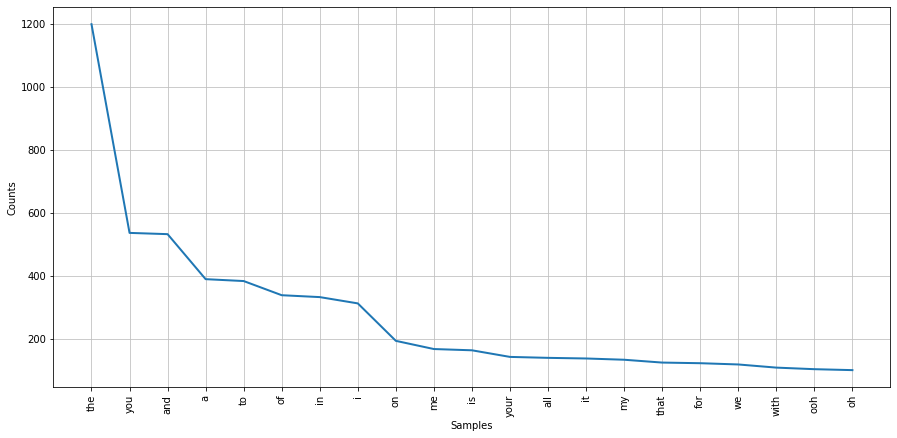

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
plt.figure(figsize=(15, 7))
freq.plot(len([i for i in freq if freq[i] > 100]))

In [13]:
from nltk.util import ngrams

In [14]:
bigram = ngrams(words, 2)

In [15]:
bidist = nltk.FreqDist(bigram)

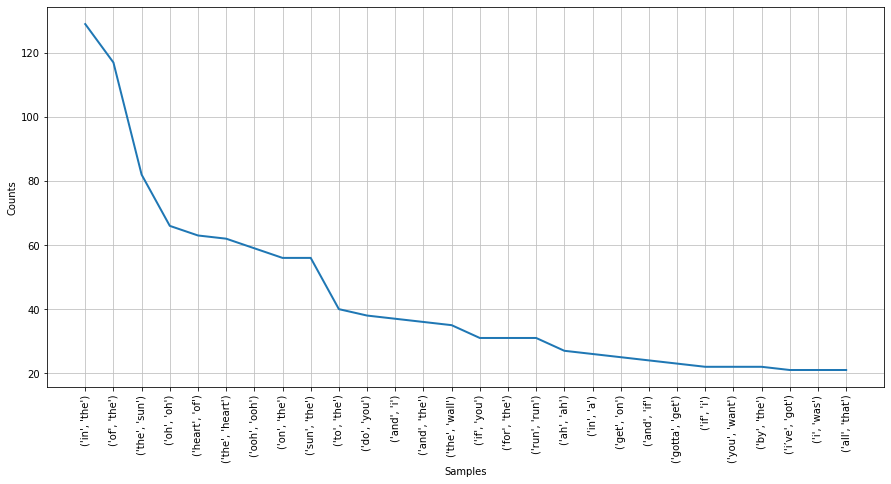

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
plt.figure(figsize=(15, 7))
bidist.plot(len([i for i in bidist if bidist[i] > 20]))

# Vetorização

In [17]:
import gensim

In [18]:
model = gensim.models.FastText([words], min_count=1, window=5, vector_size=64)

# PALAVRAS SIMILARES

In [19]:
semantically_similar_words = {w: [i[0] for i in model.wv.most_similar([w], topn=5)]
  for w in ['we', 'terminal', 'gin', 'real', 'heart', 'right', 'divided', 'watering', 'sun', 'agent']}
for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

we:['nowhere', 'fall', 'falling', 'something', 'flowing']
terminal:['worms', 'times', 'reminder', 'strain', 'bravely']
gin:['asking', 'swimming', 'thrashing', 'smiling', 'splashing']
real:['really', 'realities', 'reaching', 'everywhere', 'judging']
heart:['art', 'sun', 'apart', 'hearts', 'part']
right:['bright', 'fright', 'light', 'night', 'sight']
divided:['pretending', 'calling', 'falling', 'thought', 'burning']
watering:['covering', 'walking', 'ring', 'entering', 'ringing']
sun:['art', 'hearts', 'heart', 'part', 'heart’s']
agent:['were', 'band', 'and', 'man', 'lone']


In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=5)

In [22]:
all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])
word_vectors = model.wv[all_similar_words]
res = pca.fit_transform(word_vectors)

<Figure size 432x288 with 0 Axes>

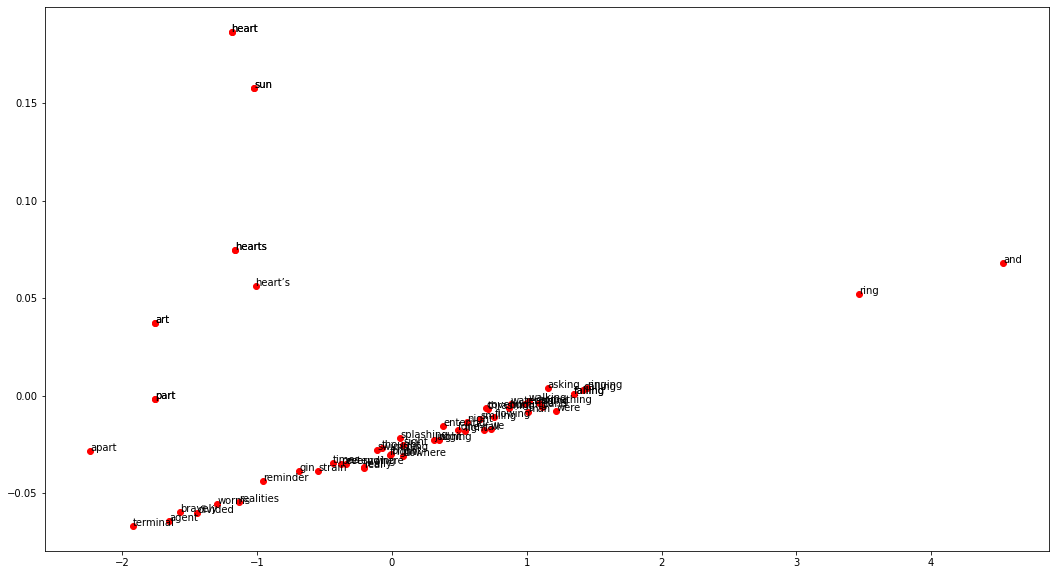

In [23]:
word_names = all_similar_words
plt.clf()
plt.figure(figsize=(18, 10))
plt.scatter(res[:, 0], res[:, 1], c='red')

for word_names, x, y in zip(word_names, res[:, 0], res[:, 1]):
    plt.annotate(word_names, xy=(x, y), xytext=(0, 0), textcoords='offset points')